In [74]:
def change_time(x):
    if x == 0:
        return 24
    elif x == 1:
        return 25
    elif x == 2:
        return 26
    else:
        return x

In [89]:
def countCatCat(df, x, y):
    temp = df.groupby(by=x)[y].value_counts().unstack().fillna(0).sort_values(b)
    plt.figure(figsize=(12, 6))
    sns.heatmap(,
                annot=True, cmap='YlGnBu', fmt='g')
    plt.title(f'{y}별 {x}의 개수')
    
    # 요일인 경우, 월화수목금토일 순서로 정렬.
    if y == '요일':
        locs, labels = plt.xticks()
        plt.xticks(locs, ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

    plt.show()

# 노출횟수 하위권 상품에 대한 EDA

- 통일된 상품명 기준, 하위권 노출횟수 상품들에 대한 EDA

In [33]:
# 모듈 불러오기
import warnings 
warnings.filterwarnings(action='ignore')

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 경로 설정
RAW_DATA = './data/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx'

In [4]:
# 데이터 로드
data = pd.read_excel(SALES_DATA, usecols = lambda x: 'Unnamed' not in x)
data

,마더코드,상품코드,상품군,상품명_통일,방송시작,방송종료,노출(분),판매단가,취급액
0,100000,200000,이미용,엘로엘 아쿠아클린마스크,2019-08-26 00:20:00,2019-08-26 01:20:00,60.0,79900,47611000
1,100000,200000,이미용,엘로엘 아쿠아클린마스크,2019-08-30 01:00:00,2019-08-30 01:55:00,55.0,79900,28951000
2,100001,200001,주방,스텐락심플스텐밀폐용기,2019-01-25 16:00:00,2019-01-25 17:00:00,60.0,99000,87062000
3,100001,200001,주방,스텐락심플스텐밀폐용기,2019-02-01 13:00:00,2019-02-01 14:00:00,60.0,99000,64274000
4,100002,200002,농수축,이보은의 우삼겹,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000
...,...,...,...,...,...,...,...,...,...
13234,100849,202513,농수축,멋진밥상 흥양농협쌀,2019-11-14 16:20:00,2019-11-14 17:20:00,60.0,58900,129387000
13235,100849,202513,농수축,멋진밥상 흥양농협쌀,2019-12-05 15:00:00,2019-12-05 15:20:00,20.0,58900,52542000
13236,100849,202513,농수축,멋진밥상 흥양농협쌀,2019-12-11 15:00:00,2019-12-11 15:20:00,20.0,58900,45331000
13237,100849,202513,농수축,멋진밥상 흥양농협쌀,2019-12-14 17:40:00,2019-12-14 18:00:00,20.0,58900,51303000


전체 취급액 합계: 816476803000, 평균: 61672090.26361508


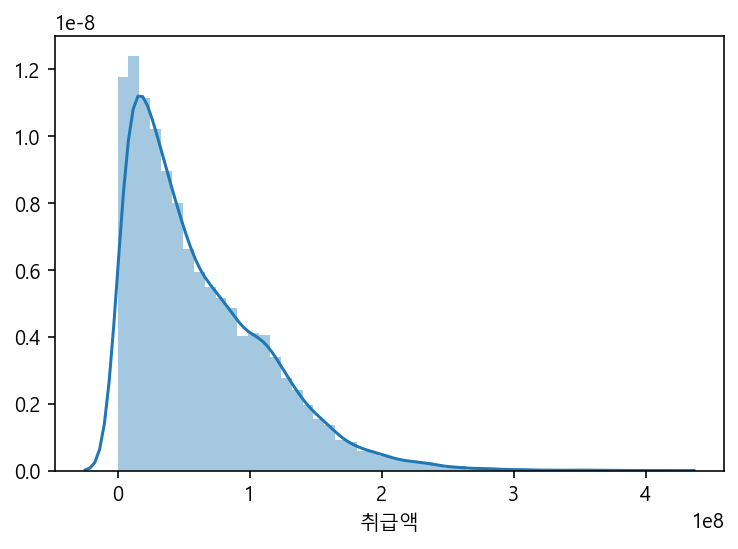

In [120]:
# 전체 취급액 합계 및 추이
print(f"전체 취급액 합계: {data['취급액'].sum()}, 평균: {data['취급액'].mean()}")
sns.distplot(data['취급액'])
plt.show()

In [75]:
# 통일된 상품명 기준, 방송 노출 시간 합계 집계
data_grouped_by_exposure = data.groupby(by=['상품군', '상품명_통일'], as_index=False)\
                                .agg({'방송시작':lambda x: list(x),
                                      '노출(분)':'sum',
                                      '판매단가':'mean',
                                      '취급액':'sum'})\
                                .sort_values(by='노출(분)')\
                                .explode('방송시작')\
                                .reset_index(drop=True)

data_grouped_by_exposure['방송시간대'] = pd.to_datetime(data_grouped_by_exposure['방송시작']).dt.hour.apply(lambda x: change_time(x))
data_grouped_by_exposure

,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
0,잡화,메이듀 여자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,14085000,25
1,잡화,메이듀 남자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,6612000,25
2,속옷,레이프릴 여자 네추럴 쿨 쉐이핑 브라,2019-07-15 01:20:00,35.167,59900.000,15323000,25
3,농수축,제주갈치고등어구이,2019-11-18 16:00:00,40.000,39900.000,41850000,16
4,속옷,오가닉뷰티 여자 360도 노라인 코튼 브라,2019-11-18 13:20:00,40.000,59900.000,53246000,13
...,...,...,...,...,...,...,...
13234,가전,LG 울트라HDTV,2019-11-10 22:20:00,52680.000,2118724.374,26323488000,22
13235,가전,LG 울트라HDTV,2019-11-12 21:20:00,52680.000,2118724.374,26323488000,21
13236,가전,LG 울트라HDTV,2019-11-14 22:20:00,52680.000,2118724.374,26323488000,22
13237,가전,LG 울트라HDTV,2019-11-16 21:20:00,52680.000,2118724.374,26323488000,21


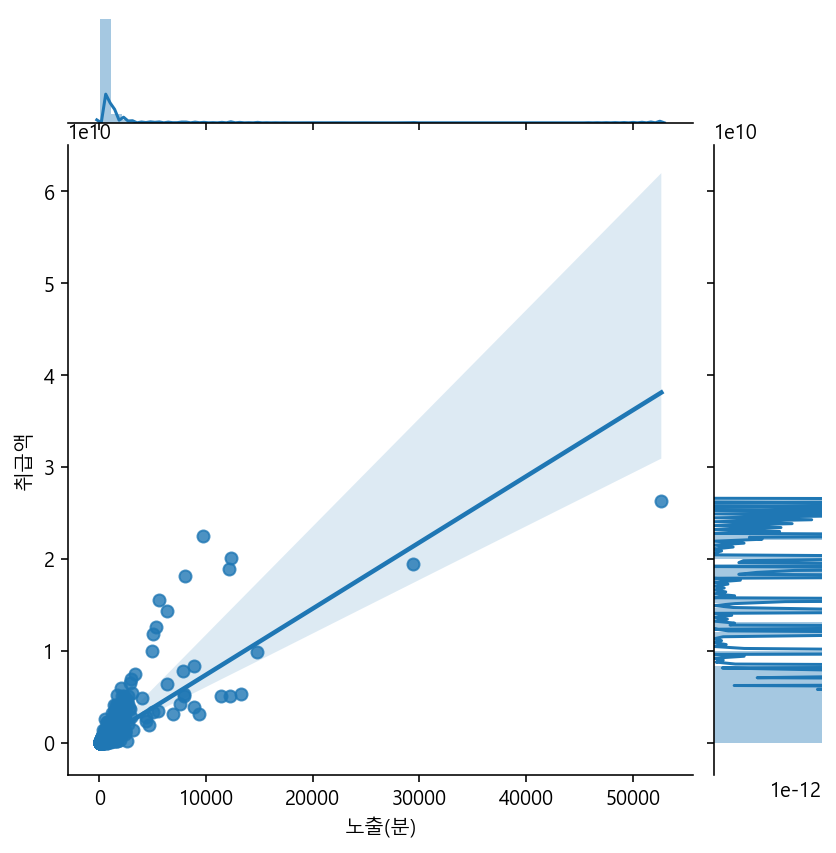

In [95]:
# 노출과 취급액과의 관계
sns.jointplot(x='노출(분)', y='취급액',
              kind='reg',
              data=data_grouped_by_exposure.drop_duplicates(subset='상품명_통일'))

# 노출 하위 x분 내에 대한 EDA

In [156]:
def checkLowExposureProducts(df, threshold):
    print(f"{threshold}분 이하의 노출 시간을 가진 상품들")
    
    temp = df.loc[df['노출(분)'] <= threshold].explode('방송시작')
    
    # 전체 상품 확인
    display(temp)
    
    # 판매단가 및 취급액의 분포 확인
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(temp['판매단가'], ax=axes.flat[0])
    plt.ticklabel_format(style='plain')
    axes.flat[1].hist(temp['취급액'], color='skyblue', edgecolor='white', linewidth=1)
    plt.show()
    
    # 노출 하위 시간대 상품군별 방송시간대 확인
    countCatCat(temp, '상품군', '방송시간대')
    
    # 상품군별 취급액 확인
    sns.barplot(x='상품군', y='취급액', data=temp)
    
    return temp

1. 노출시간 60분 이내
    - 취급액 평균 이하 많음.
    - 주로 농수축, 의류, 잡화.
    - 시간대는 오전, 새벽이 많음.

60분 이하의 노출 시간을 가진 상품들


,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
0,잡화,메이듀 여자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,14085000,25
1,잡화,메이듀 남자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,6612000,25
2,속옷,레이프릴 여자 네추럴 쿨 쉐이핑 브라,2019-07-15 01:20:00,35.167,59900.000,15323000,25
3,농수축,제주갈치고등어구이,2019-11-18 16:00:00,40.000,39900.000,41850000,16
4,속옷,오가닉뷰티 여자 360도 노라인 코튼 브라,2019-11-18 13:20:00,40.000,59900.000,53246000,13
...,...,...,...,...,...,...,...
182,농수축,속초명물티각태각부각,2019-04-14 06:00:00,60.000,40900.000,33275000,6
183,의류,NNF 여자 쿠션퍼자켓+베스트,2019-01-02 09:00:00,60.000,39900.000,74098000,9
184,의류,EXR 남자 리버시블 자켓,2019-10-01 08:00:00,60.000,69000.000,17225000,8
185,의류,NNF 여자 터틀넥,2019-11-05 19:20:00,60.000,59000.000,34515000,19


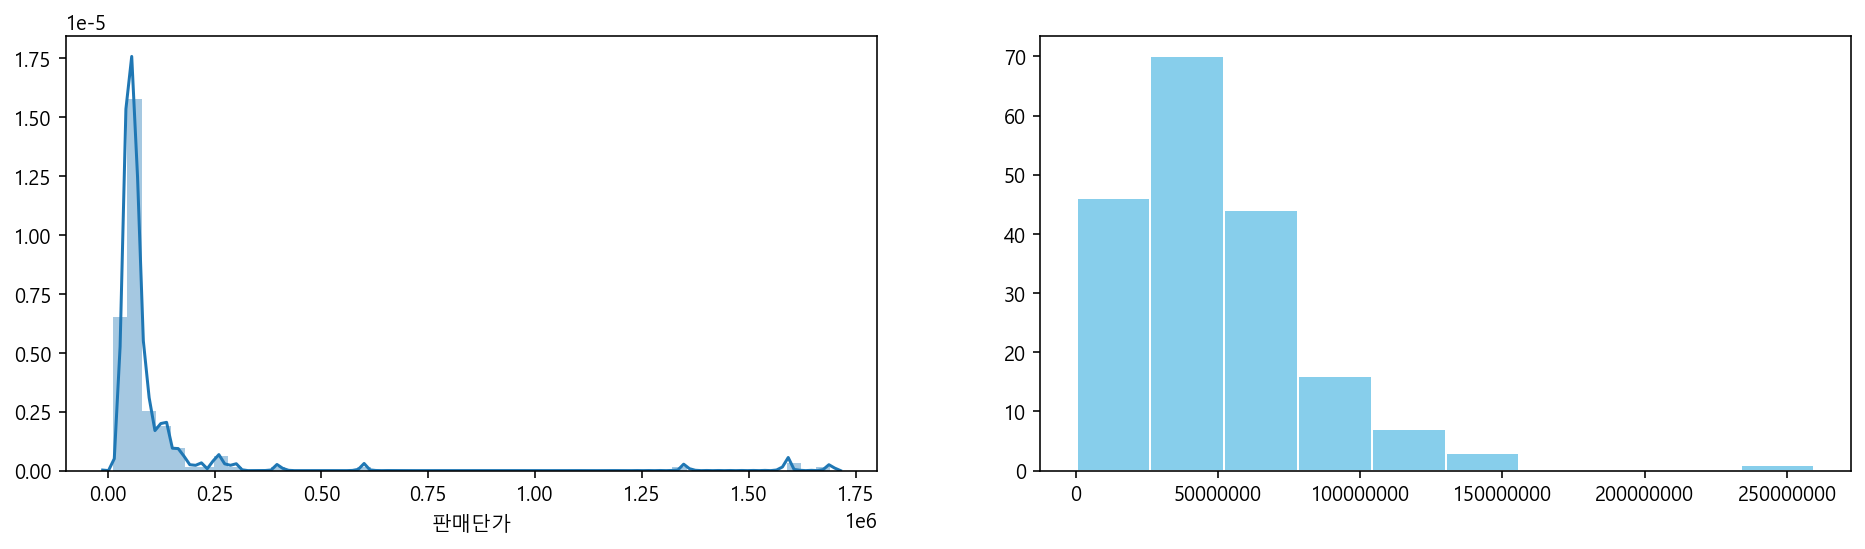

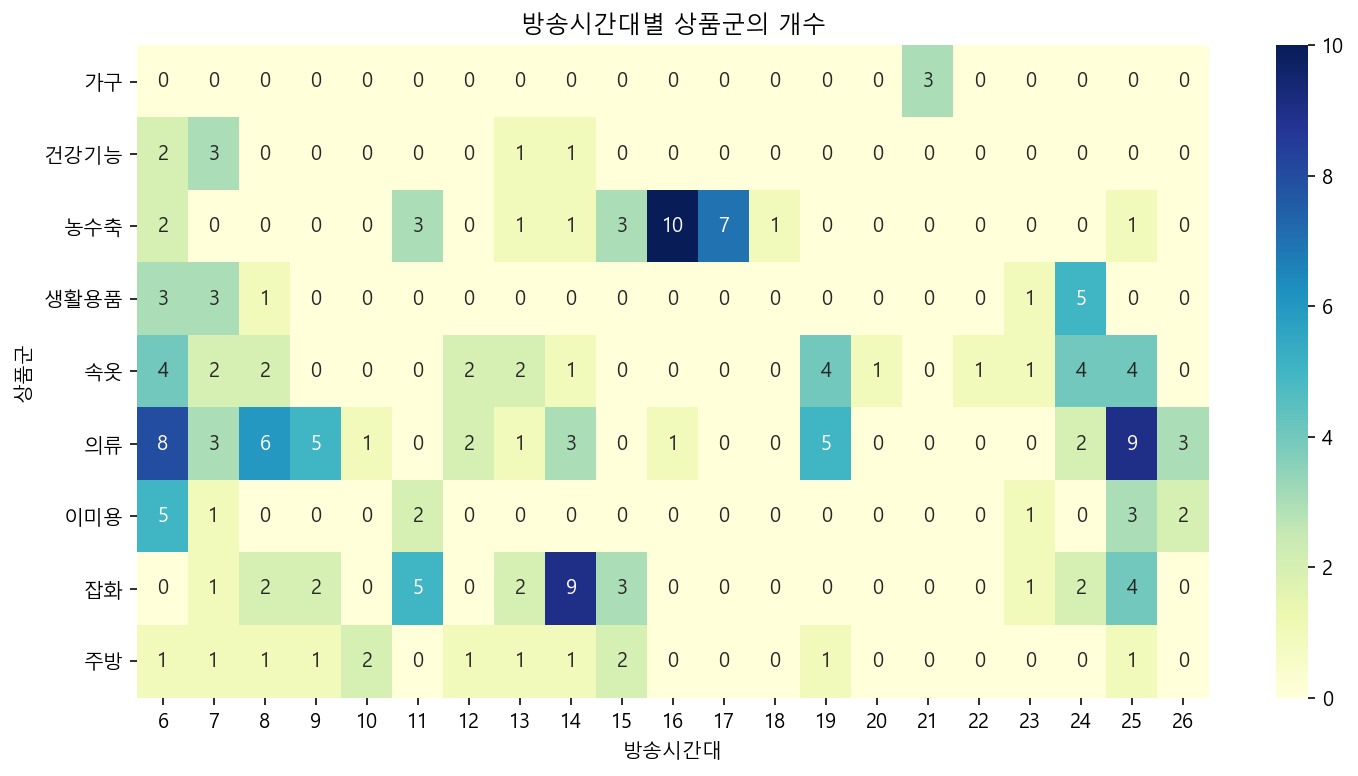

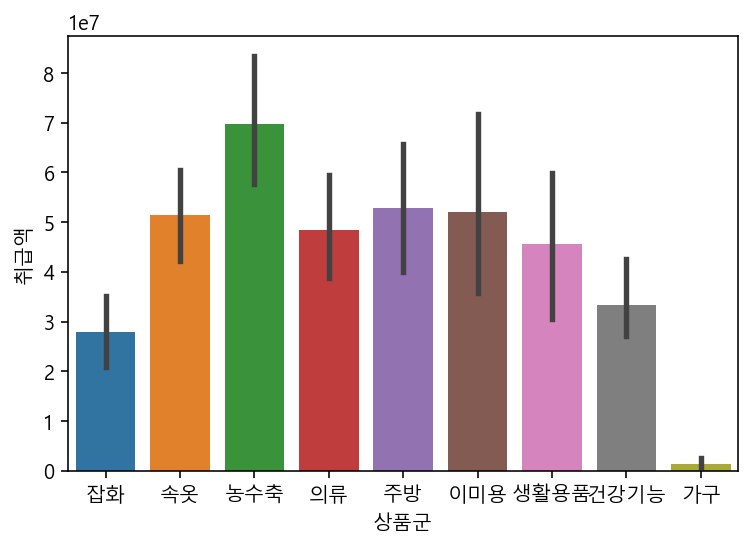

In [151]:
# 60분 이하
checkLowExposureProducts(data_grouped_by_exposure, 60)

90분 이하의 노출 시간을 가진 상품들


,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
0,잡화,메이듀 여자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,14085000,25
1,잡화,메이듀 남자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,6612000,25
2,속옷,레이프릴 여자 네추럴 쿨 쉐이핑 브라,2019-07-15 01:20:00,35.167,59900.000,15323000,25
3,농수축,제주갈치고등어구이,2019-11-18 16:00:00,40.000,39900.000,41850000,16
4,속옷,오가닉뷰티 여자 360도 노라인 코튼 브라,2019-11-18 13:20:00,40.000,59900.000,53246000,13
...,...,...,...,...,...,...,...
182,농수축,속초명물티각태각부각,2019-04-14 06:00:00,60.000,40900.000,33275000,6
183,의류,NNF 여자 쿠션퍼자켓+베스트,2019-01-02 09:00:00,60.000,39900.000,74098000,9
184,의류,EXR 남자 리버시블 자켓,2019-10-01 08:00:00,60.000,69000.000,17225000,8
185,의류,NNF 여자 터틀넥,2019-11-05 19:20:00,60.000,59000.000,34515000,19


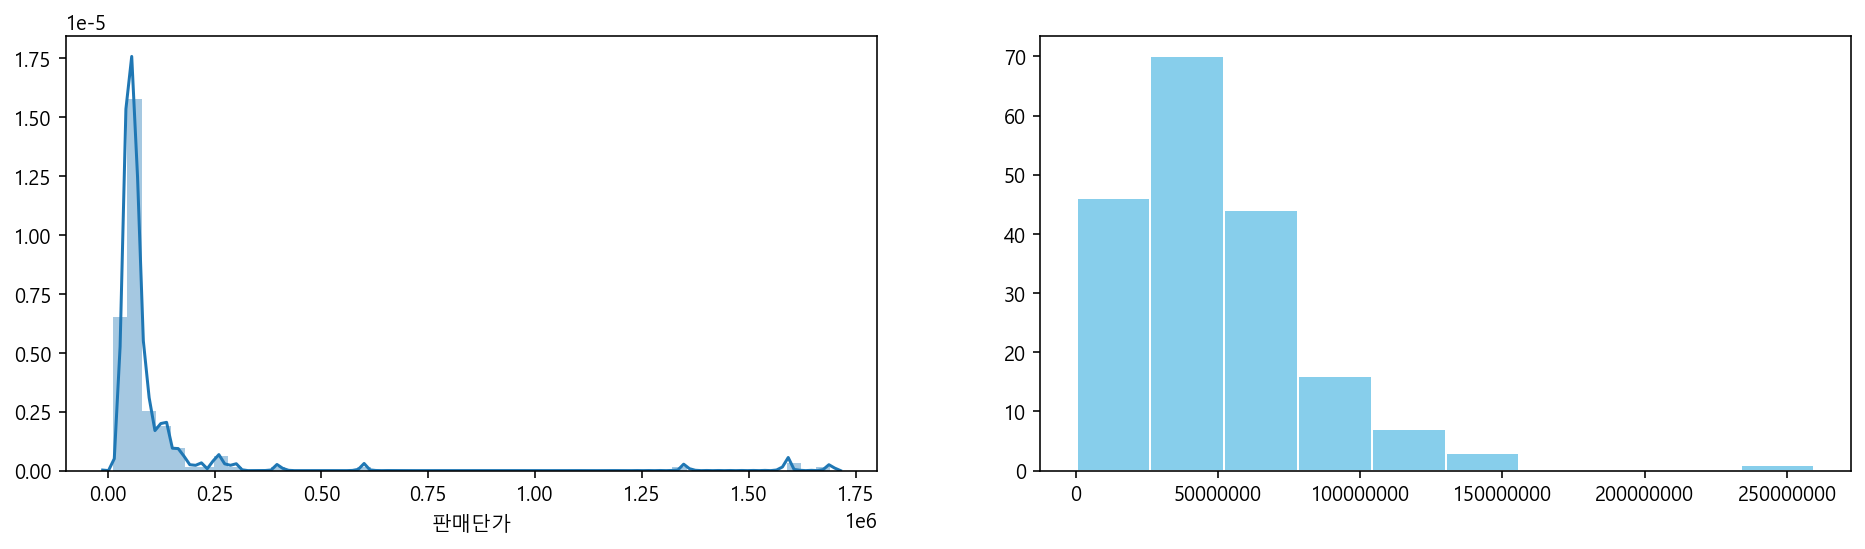

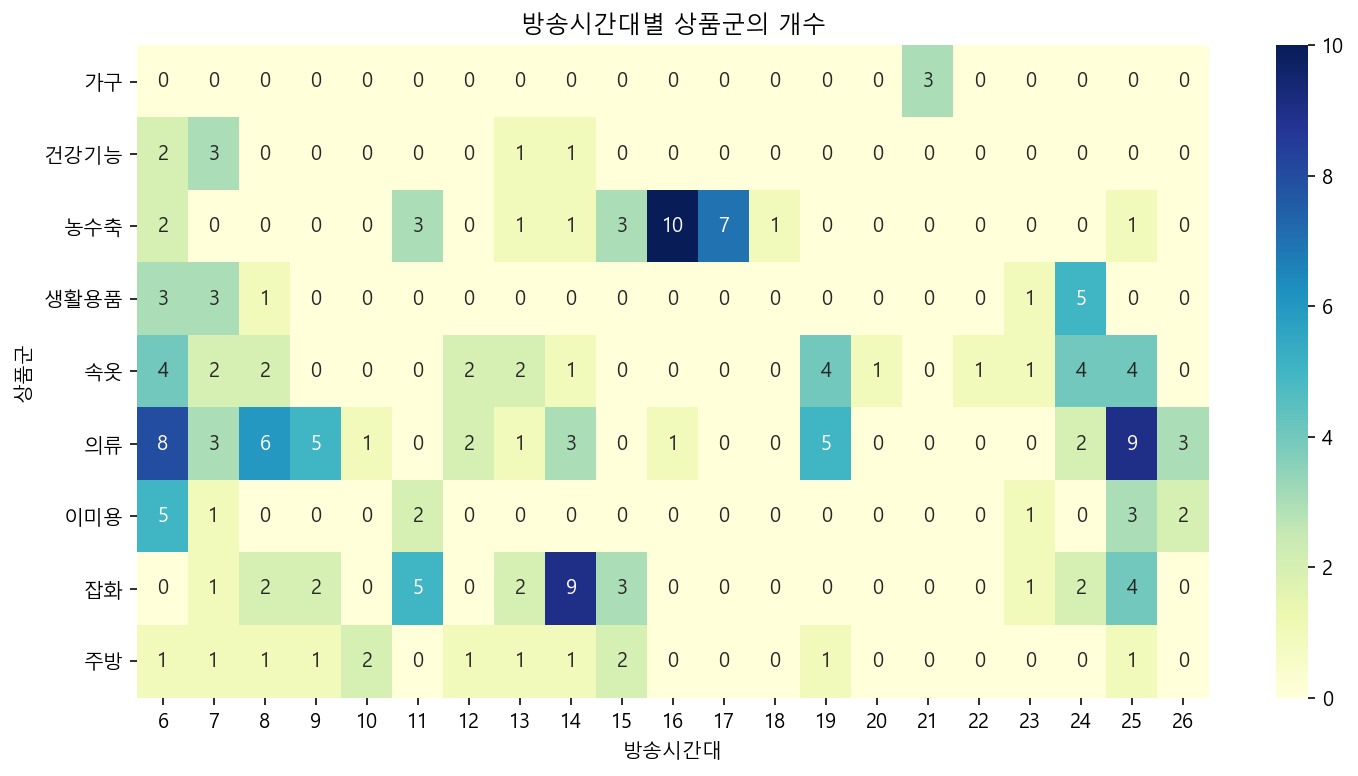

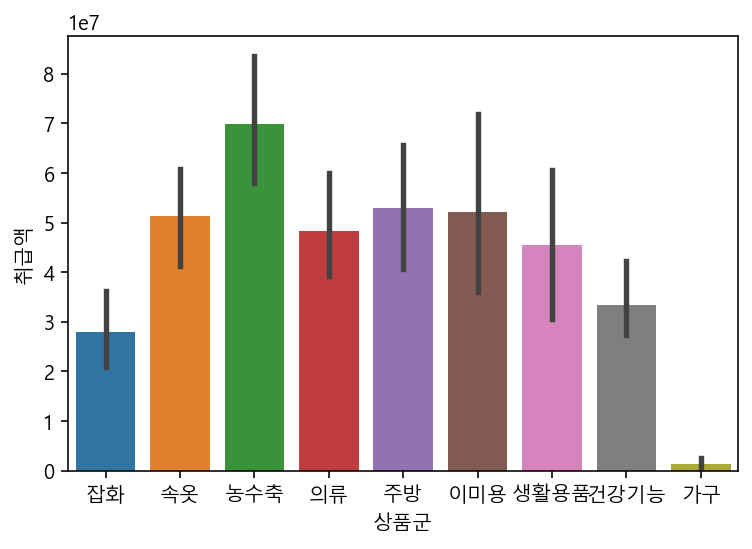

In [153]:
# 90분 이하
checkLowExposureProducts(data_grouped_by_exposure, 90)

120분 이하의 노출 시간을 가진 상품들


,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
0,잡화,메이듀 여자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,14085000,25
1,잡화,메이듀 남자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,6612000,25
2,속옷,레이프릴 여자 네추럴 쿨 쉐이핑 브라,2019-07-15 01:20:00,35.167,59900.000,15323000,25
3,농수축,제주갈치고등어구이,2019-11-18 16:00:00,40.000,39900.000,41850000,16
4,속옷,오가닉뷰티 여자 360도 노라인 코튼 브라,2019-11-18 13:20:00,40.000,59900.000,53246000,13
...,...,...,...,...,...,...,...
525,생활용품,대웅모닝컴 굿템스탠드선풍기,2019-07-05 19:00:00,120.000,59800.000,154708000,19
526,생활용품,도루코 페이스5면도기세트,2019-08-15 23:00:00,120.000,44700.000,64329000,23
527,생활용품,도루코 페이스5면도기세트,2019-08-15 23:00:00,120.000,44700.000,64329000,23
528,주방,SK매직 식기세척기,2019-09-05 23:00:00,120.000,1184400.000,121400000,23


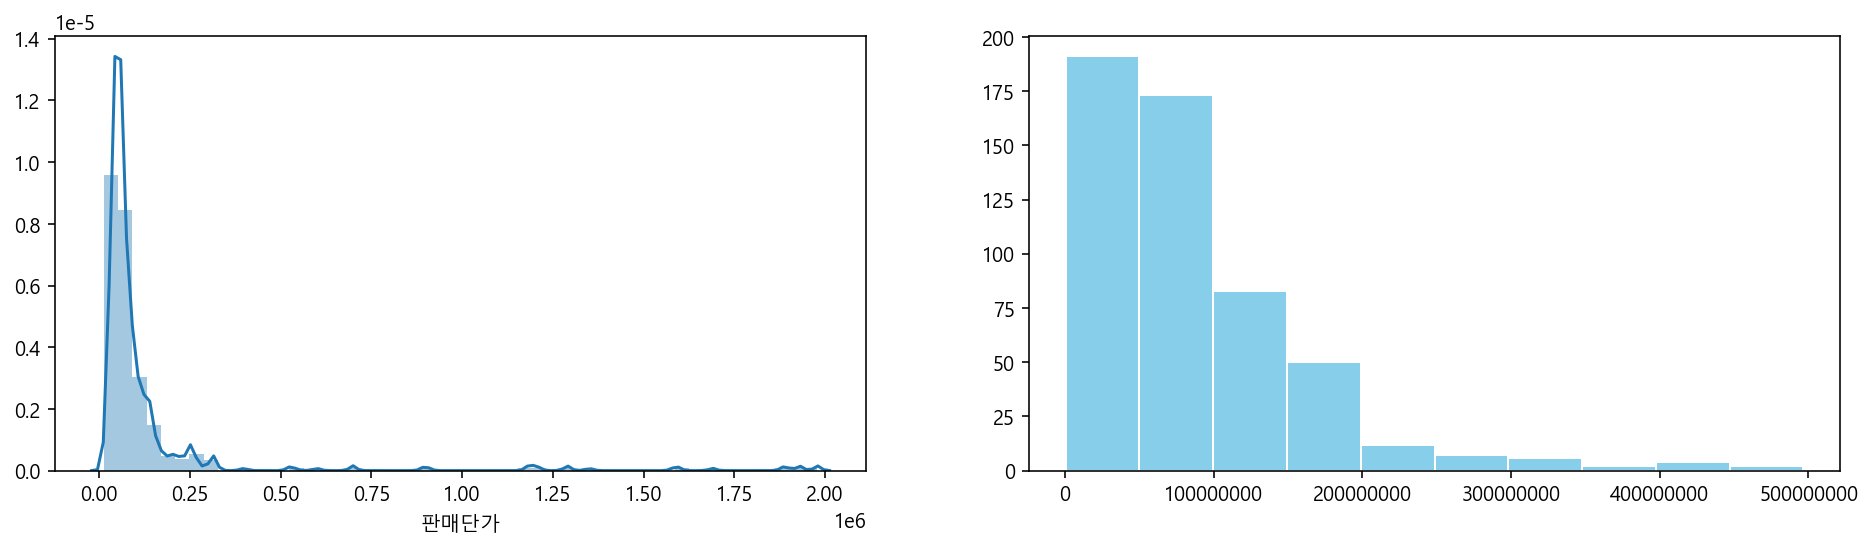

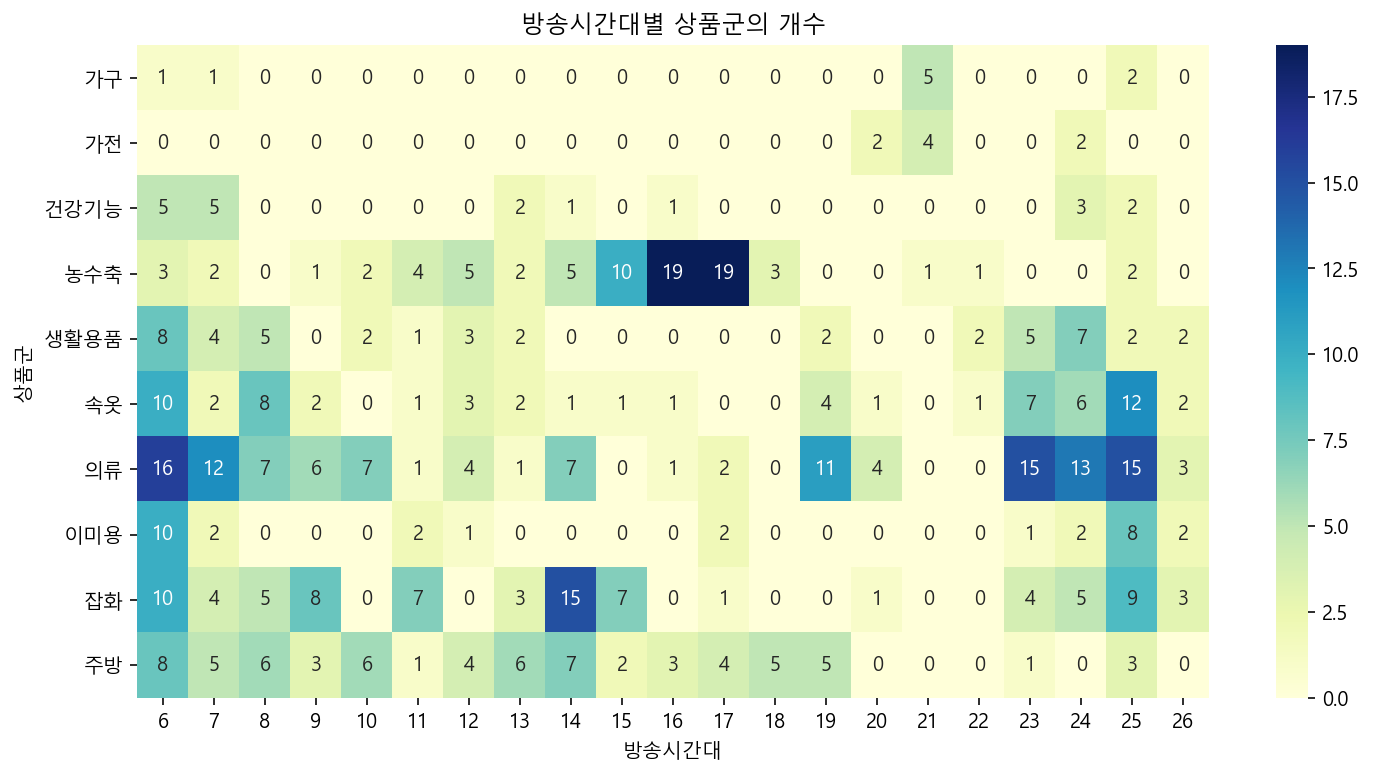

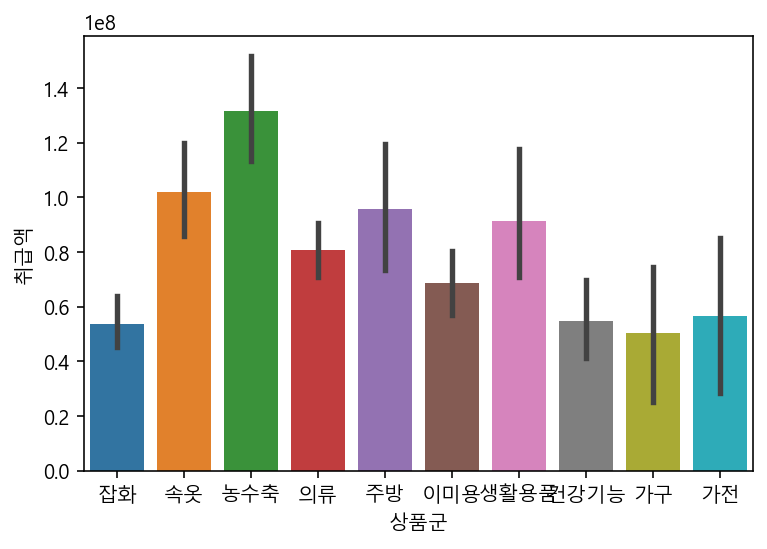

In [152]:
# 120분 이하
checkLowExposureProducts(data_grouped_by_exposure, 120)

180분 이하의 노출 시간을 가진 상품들


,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
0,잡화,메이듀 여자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,14085000,25
1,잡화,메이듀 남자 린넨블렌디드슬립온,2019-06-10 01:20:00,32.667,29800.000,6612000,25
2,속옷,레이프릴 여자 네추럴 쿨 쉐이핑 브라,2019-07-15 01:20:00,35.167,59900.000,15323000,25
3,농수축,제주갈치고등어구이,2019-11-18 16:00:00,40.000,39900.000,41850000,16
4,속옷,오가닉뷰티 여자 360도 노라인 코튼 브라,2019-11-18 13:20:00,40.000,59900.000,53246000,13
...,...,...,...,...,...,...,...
774,의류,마르엘라로사티 여자 기모 본딩 팬츠,2019-11-23 11:20:00,180.000,69900.000,304762000,11
775,의류,마르엘라로사티 여자 기모 본딩 팬츠,2019-12-10 07:20:00,180.000,69900.000,304762000,7
776,속옷,크로커다일 여자 에어스킨 감탄브라,2019-06-30 23:20:00,180.000,79900.000,322141000,23
777,속옷,크로커다일 여자 에어스킨 감탄브라,2019-07-04 20:00:00,180.000,79900.000,322141000,20


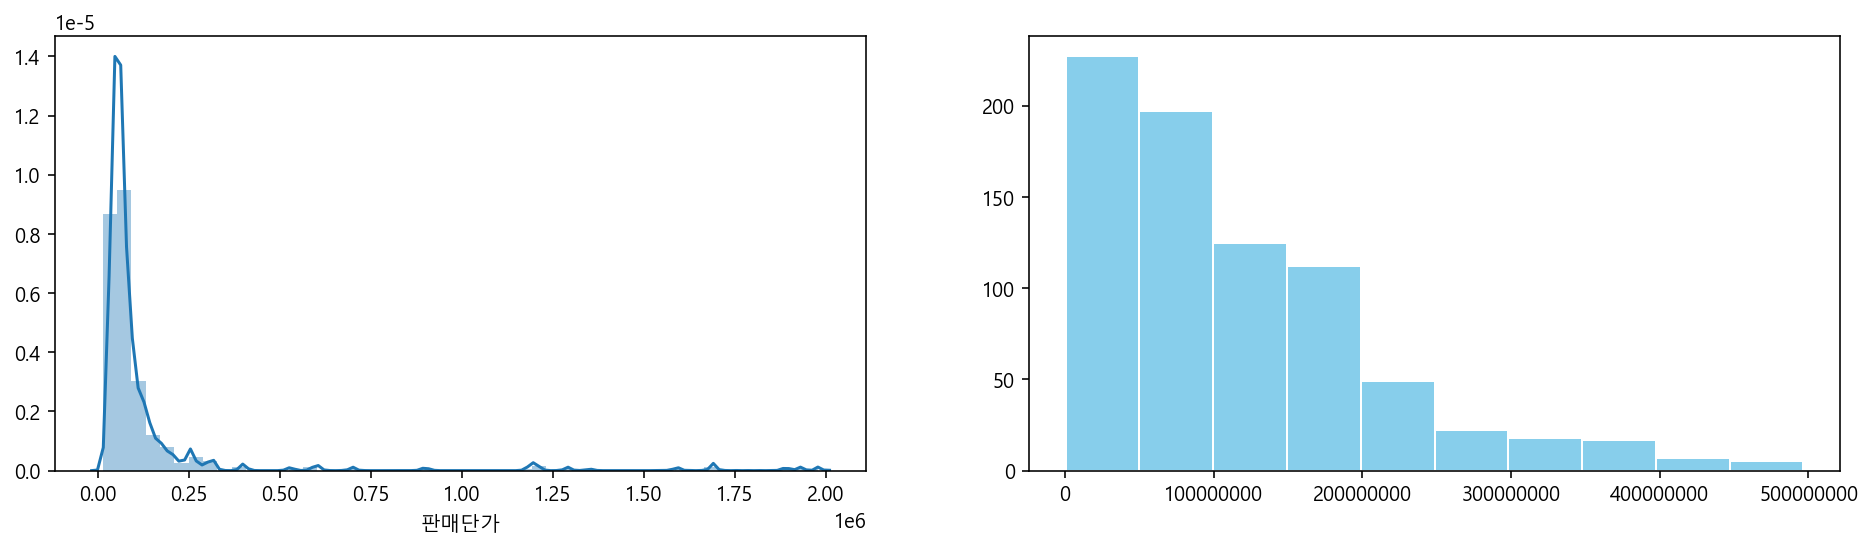

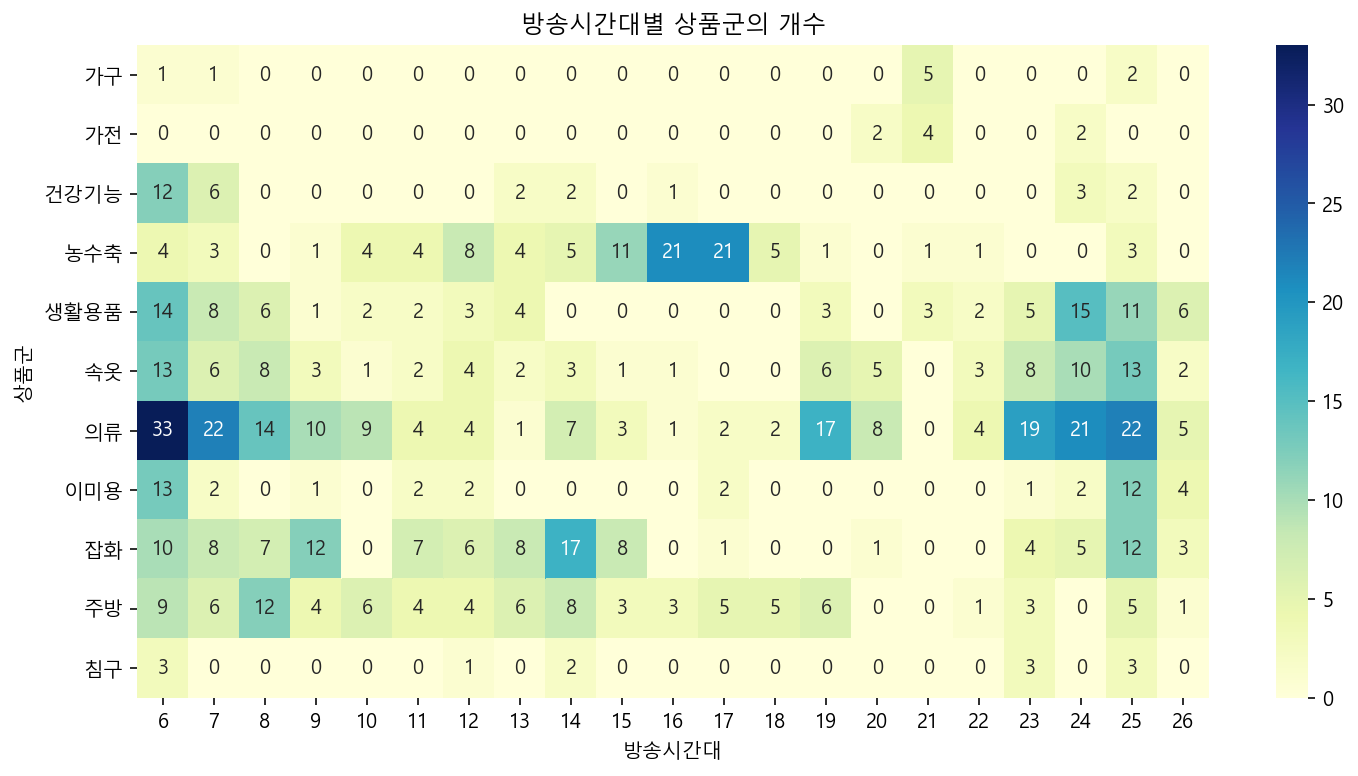

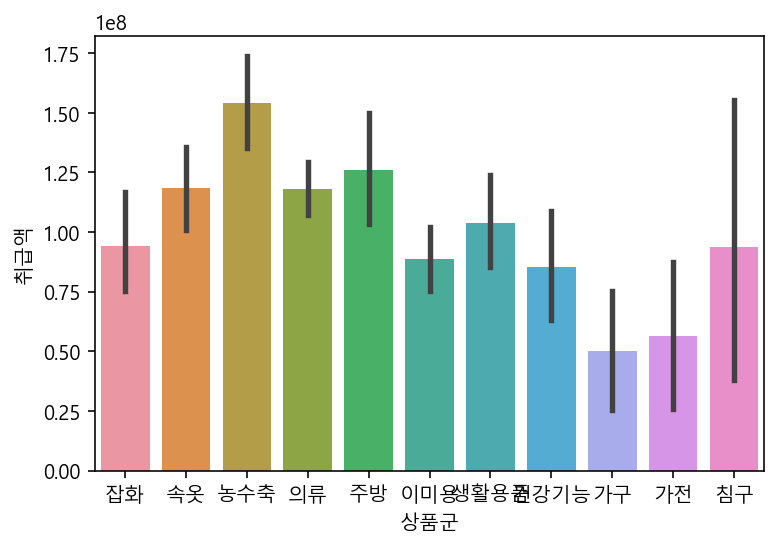

In [154]:
# 180분 이하
checkLowExposureProducts(data_grouped_by_exposure, 180)

# 노출 x분 이상 y분 이하 EDA

In [173]:
def checkExposureProducts(df, lower, higher, return_df=False):
    print(f"{lower}분 이상 {higher}분 이하의 노출 시간을 가진 상품들")
    
    temp = df.loc[(df['노출(분)'] >= lower) & (df['노출(분)'] <= higher)].explode('방송시작')
    
    # 전체 상품 확인
    display(temp)
    
    # 판매단가 및 취급액의 분포 확인
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(temp['판매단가'], ax=axes.flat[0])
    plt.ticklabel_format(style='plain')
    axes.flat[1].hist(temp['취급액'], color='skyblue', edgecolor='white', linewidth=1)
    plt.show()
    
    # 노출 하위 시간대 상품군별 방송시간대 확인
    countCatCat(temp, '상품군', '방송시간대')
    
    # 상품군별 취급액 확인
    sns.barplot(x='상품군', y='취급액', data=temp)
    
    if return_df:
        return temp

180분 이상 1200분 이하의 노출 시간을 가진 상품들


,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
605,생활용품,파로마 레어메모리폼타퍼,2019-10-21 00:00:00,180.000,295666.667,35171000,24
606,생활용품,파로마 레어메모리폼타퍼,2019-10-21 00:00:00,180.000,295666.667,35171000,24
607,생활용품,파로마 레어메모리폼타퍼,2019-10-21 00:00:00,180.000,295666.667,35171000,24
608,의류,그랙노먼 여자 폴로셔츠,2019-06-13 06:00:00,180.000,55666.667,179734000,6
609,의류,그랙노먼 여자 폴로셔츠,2019-05-05 07:00:00,180.000,55666.667,179734000,7
...,...,...,...,...,...,...,...
5300,잡화,칼리베이직 패브릭백,2019-10-24 09:00:00,1200.000,59000.000,2333389000,9
5301,잡화,칼리베이직 패브릭백,2019-10-29 09:00:00,1200.000,59000.000,2333389000,9
5302,잡화,칼리베이직 패브릭백,2019-11-01 11:20:00,1200.000,59000.000,2333389000,11
5303,잡화,칼리베이직 패브릭백,2019-11-07 09:20:00,1200.000,59000.000,2333389000,9


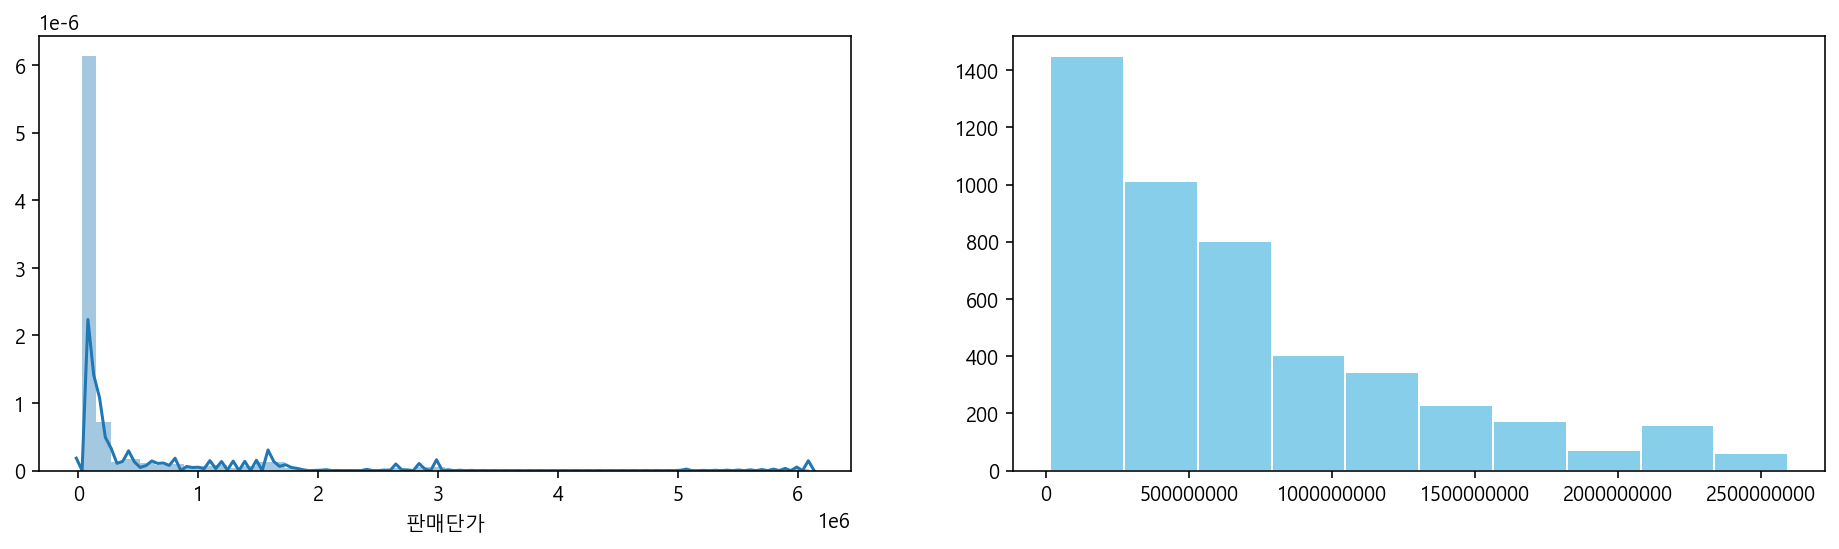

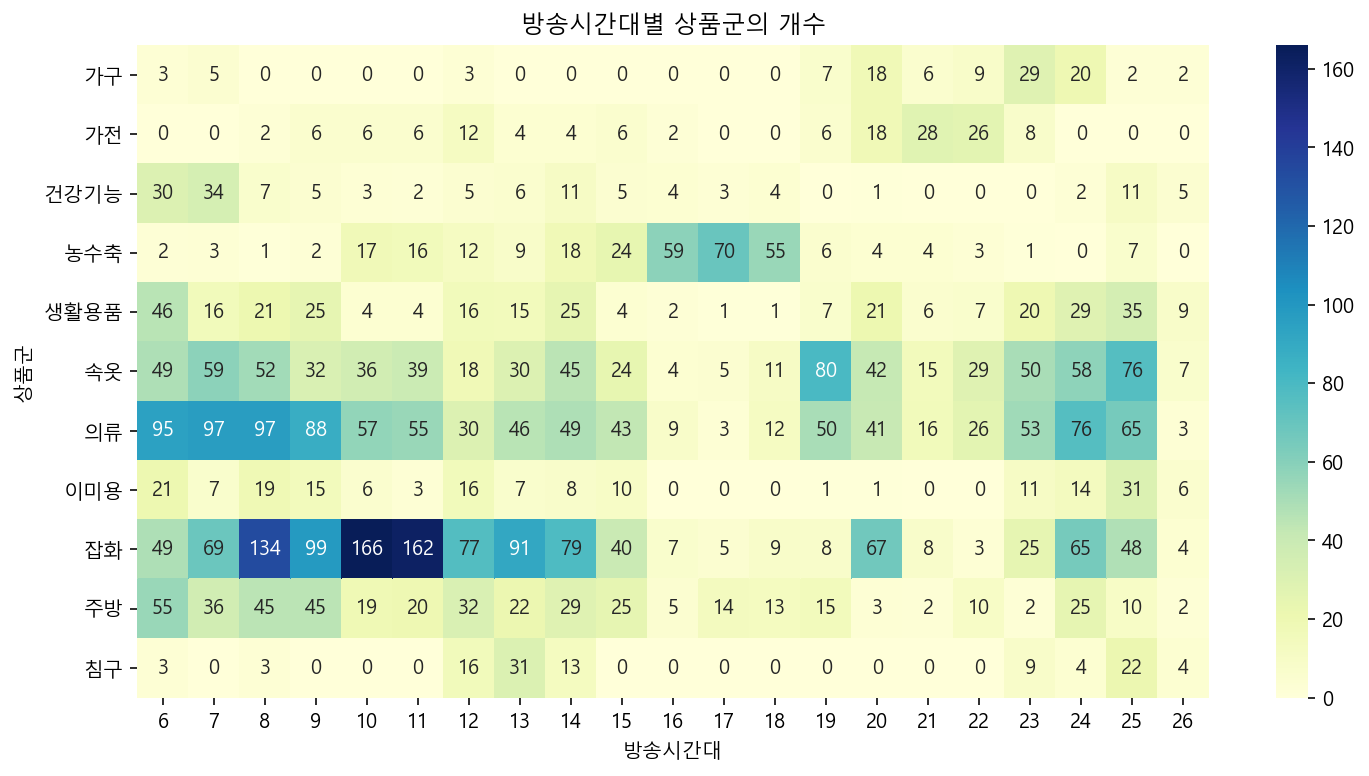

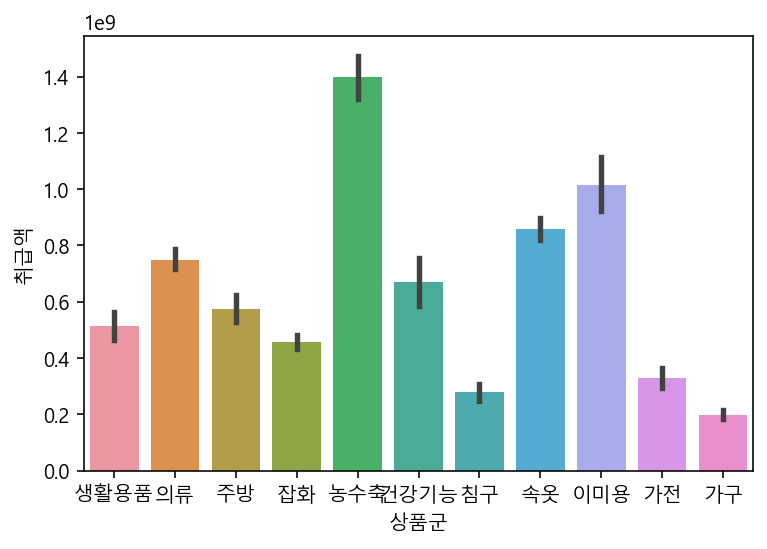

In [174]:
# 180분 이상 1200분 이하
checkExposureProducts(data_grouped_by_exposure, 180, 1200) # 1200 / 60 = 20회로 계산

1200분 이상 2400분 이하의 노출 시간을 가진 상품들


,상품군,상품명_통일,방송시작,노출(분),판매단가,취급액,방송시간대
5165,주방,아이넥스 올스텐싱크선반,2019-02-25 11:00:00,1200.000,91400.000,867347000,11
5166,주방,아이넥스 올스텐싱크선반,2019-03-05 08:00:00,1200.000,91400.000,867347000,8
5167,주방,아이넥스 올스텐싱크선반,2019-03-22 06:00:00,1200.000,91400.000,867347000,6
5168,주방,아이넥스 올스텐싱크선반,2019-03-25 13:00:00,1200.000,91400.000,867347000,13
5169,주방,아이넥스 올스텐싱크선반,2019-03-27 06:00:00,1200.000,91400.000,867347000,6
...,...,...,...,...,...,...,...
7417,침구,보몽드 엘사자수쿨시어서커침구세트,2019-07-11 11:00:00,2400.000,74900.000,1323611000,11
7418,침구,보몽드 엘사자수쿨시어서커침구세트,2019-07-14 12:00:00,2400.000,74900.000,1323611000,12
7419,침구,보몽드 엘사자수쿨시어서커침구세트,2019-07-15 15:00:00,2400.000,74900.000,1323611000,15
7420,침구,보몽드 엘사자수쿨시어서커침구세트,2019-07-17 13:00:00,2400.000,74900.000,1323611000,13


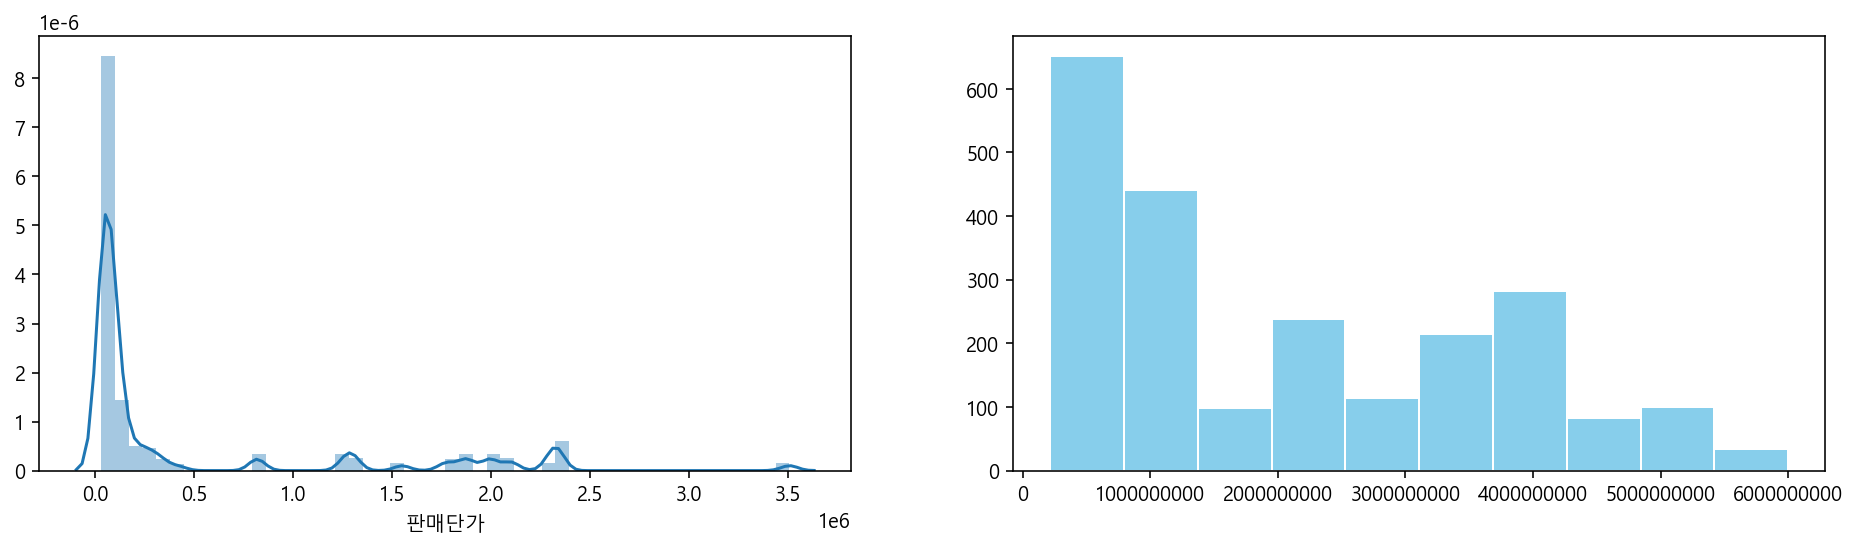

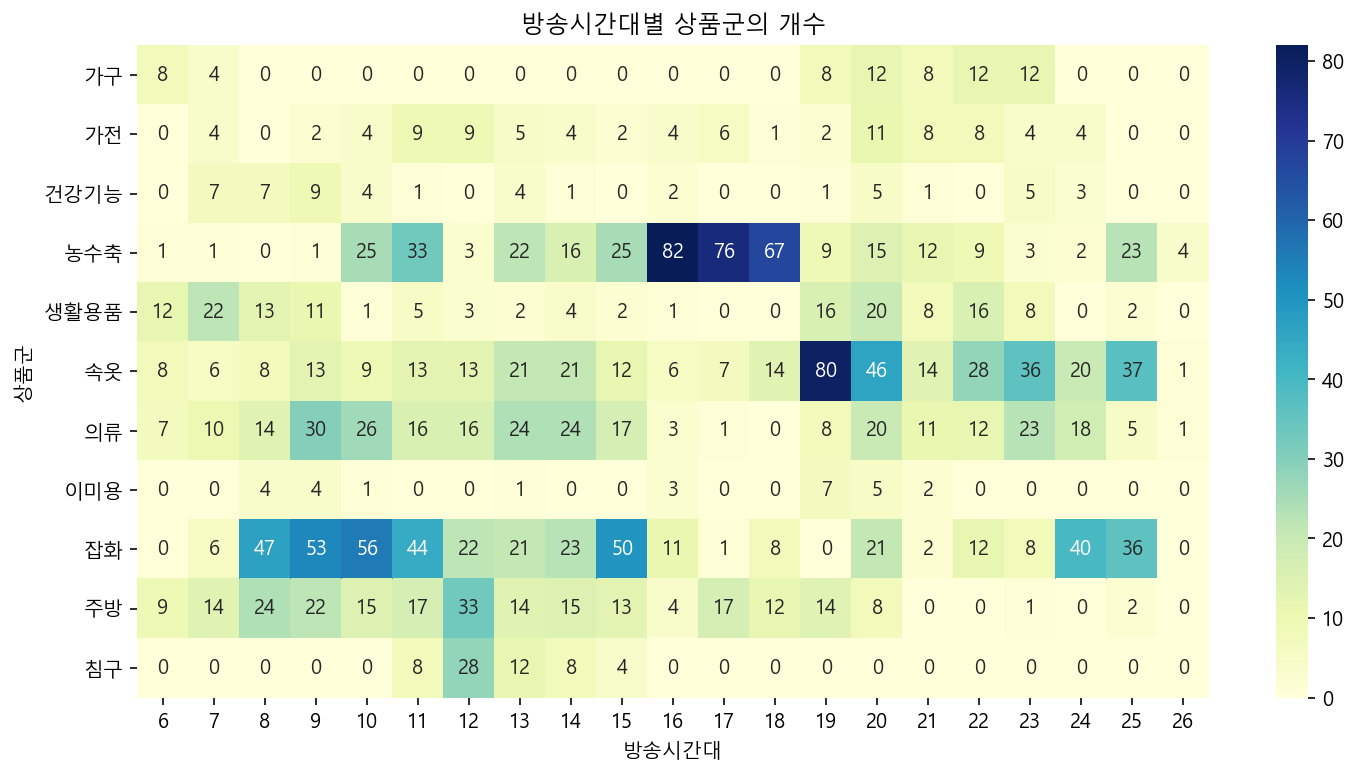

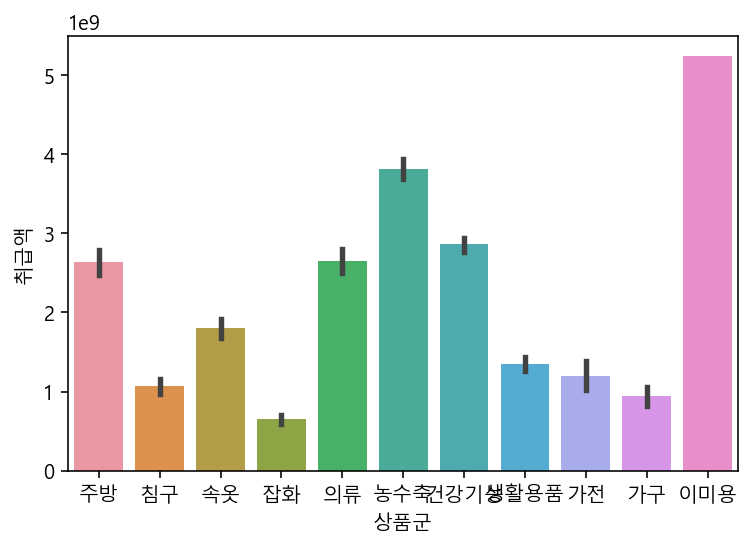

In [175]:
# 1200분 이상 2400분 이하
checkExposureProducts(data_grouped_by_exposure, 1200, 2400) # 1200 / 60 = 20회로 계산